# Baseline model

In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cdc_data = pd.read_csv('data/cdc_average_bystate_2013-2017.csv')

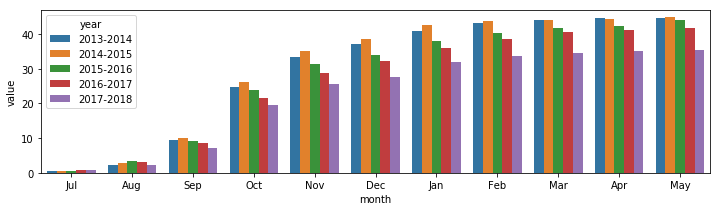

In [91]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.barplot(x='month', y='value', hue='year', 
            hue_order=['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018'],
            data=cdc_data[cdc_data.state_or_region=='Louisiana'], ax=ax)

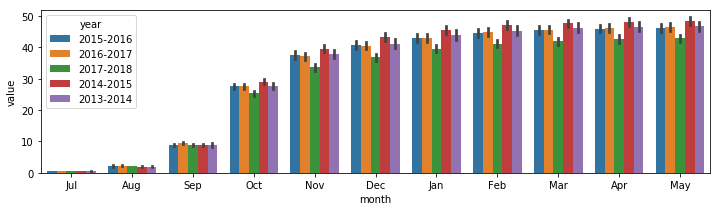

In [21]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.barplot(x='month', y='value', hue='year', 
            data=cdc_data, ax=ax)

In [23]:
pivoted_data = pd.pivot_table(cdc_data, values='value', columns=['month', 'year'], index='state_or_region')

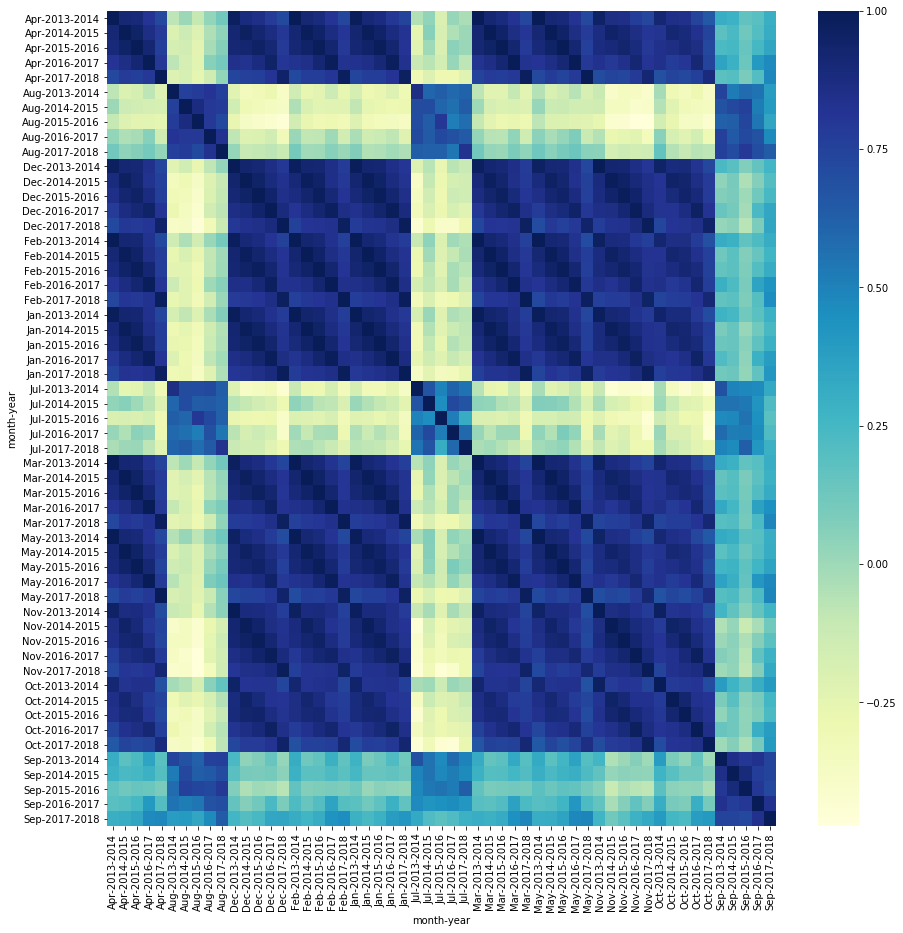

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pivoted_data.corr(), cmap="YlGnBu", cbar=True, ax=ax)

In [32]:
# Taking the average of the first three years

In [34]:
cdc_data.year.unique()

array(['2015-2016', '2016-2017', '2017-2018', '2014-2015', '2013-2014'],
      dtype=object)

In [43]:
three_year_avg_13_16 = pd.pivot_table(cdc_data[cdc_data.year.isin(['2013-2014', '2014-2015', '2015-2016'])],
                values='value', columns=['month'], index='state_or_region')

In [46]:
data_16_18 = pd.pivot_table(cdc_data[cdc_data.year.isin(['2016-2017', '2017-2018'])],
                values='value', columns=['year', 'month'], index='state_or_region')

In [66]:
def calculate_regression_squares_dataframes(dataframe1, dataframe2):
    diff = dataframe1 - dataframe2
    diff = diff**2
    return diff.sum(axis=1)

def calculate_total_varience(dataframe):
    diff = dataframe.subtract(dataframe.mean(axis=1), axis='rows')
    dif = diff**2
    return dif.sum(axis=1)

def calculate_coeff_varience(exp_df, model_df):
    return 1 - calculate_regression_squares_dataframes(exp_df, model_df)/calculate_total_varience(exp_df)

In [84]:
results_2016 = calculate_coeff_varience(data_16_18['2016-2017'], three_year_avg_13_16)

In [85]:
results_2017 = calculate_coeff_varience(data_16_18['2017-2018'], three_year_avg_13_16)

In [92]:
residuals = pd.concat([results_2016, results_2017], axis=1)

In [96]:
residuals.columns = ['2016-17', '2017-18']

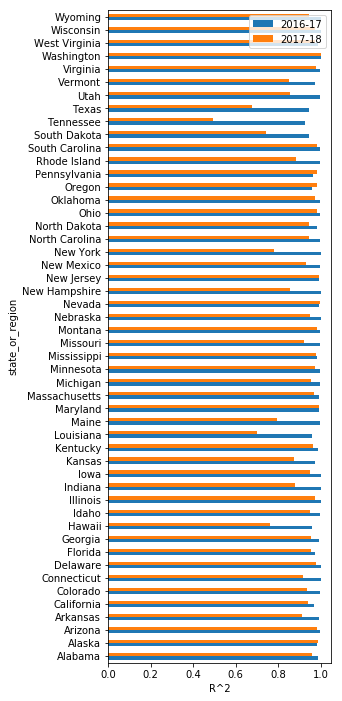

In [104]:
fig, ax = plt.subplots(figsize=(4,12))

residuals.plot.barh(ax=ax);
ax.set_xlabel('R^2');